In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
import random

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv', encoding = "utf-8")

Using Pandas Data Directly

In [73]:
X = data[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = data['diabetes']
X = pd.get_dummies(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [77]:
predictions = clf.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9703

In [79]:
importance = clf.feature_importances_
for i, n in enumerate(importance):
    importance[i] *= 1000
key_importance = list(zip(X.columns, importance))
key_importance

[('age', 106.44974003213441),
 ('hypertension', 14.798725975566057),
 ('heart_disease', 11.02640880588388),
 ('bmi', 123.76433323491548),
 ('HbA1c_level', 401.2993566541934),
 ('blood_glucose_level', 319.49957625352306),
 ('gender_Female', 2.373951905503614),
 ('gender_Male', 2.4366318970867726),
 ('gender_Other', 0.0024504405010010856),
 ('smoking_history_No Info', 4.6644139261790265),
 ('smoking_history_current', 2.4707781884640134),
 ('smoking_history_ever', 2.102018408403119),
 ('smoking_history_former', 3.582689663252006),
 ('smoking_history_never', 3.3184380830081457),
 ('smoking_history_not current', 2.2104865313862034)]

Converting to dictionaries --> removing negative data

In [3]:
dataset = data.to_dict(orient='records')

In [4]:
for d in dataset:
    if d['gender'] == 'Male':
        d['gender'] = 1
    else:
        d['gender'] = 0

In [5]:
# getting rid of negative data
# we have 8500 instances of positive data

removeMultiplier = 1 # ratio of negative data to positive data
numToRemove = int(len(dataset) - (removeMultiplier * 8500 + 8500))
random.shuffle(dataset)

dataset.sort(key = lambda d: d['diabetes'], reverse=True)
for i in range(numToRemove):
    dataset.pop()

random.shuffle(dataset)

In [6]:
data = pd.DataFrame(dataset)

In [7]:
keys = []
for d in dataset[0]:
    keys.append(d)
keys.remove('diabetes')
keys.remove('smoking_history')
keys

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [8]:
X = data[keys]
y = data['diabetes']
X = pd.get_dummies(X)
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,1,56.0,0,0,31.35,6.5,145
1,1,23.0,0,0,27.90,6.2,85
2,0,75.0,0,1,35.18,6.8,200
3,0,59.0,0,0,23.80,6.5,140
4,1,62.0,0,0,29.05,8.8,200
...,...,...,...,...,...,...,...
16995,1,43.0,0,0,27.32,5.7,90
16996,1,43.0,0,0,30.37,9.0,159
16997,1,73.0,0,1,24.64,8.8,159
16998,0,55.0,0,0,27.32,6.0,160


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Base Model
clf = RandomForestClassifier(n_estimators=100, max_depth = 10, min_samples_split = 10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [28]:
predictions = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9101960784313725

In [18]:
importance = clf.feature_importances_
for i, n in enumerate(importance):
    importance[i] *= 1000
key_importance = list(zip(X.columns, importance))

In [19]:
key_importance

[('gender', 8.029777556142076),
 ('age', 176.12621530540858),
 ('hypertension', 26.54069670500226),
 ('heart_disease', 12.906994433944435),
 ('bmi', 136.39694512021237),
 ('HbA1c_level', 354.0033916064425),
 ('blood_glucose_level', 285.9959792728479)]

In [11]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split
               }

In [14]:
bestAccuracy = 0
bestEstimator = 0
bestDepth = 0
bestSamples_split = 0
accuracies = []

for estimator in n_estimators:
    for depth in max_depth:
        for samples_split in min_samples_split:
            clf = RandomForestClassifier(n_estimators=estimator, max_depth=depth, min_samples_split=samples_split, random_state = 42)
            clf.fit(X_train, y_train)
            predictions = clf.predict(X_test)
            accuracy = accuracy_score(y_test, predictions)
            accuracies.append(accuracy)
            print(estimator, depth, samples_split, accuracy)
            if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestEstimator = estimator
                bestDepth = depth
                bestSamples_split = samples_split

100 10 2 0.9090196078431373
100 10 5 0.9086274509803921
100 10 10 0.9101960784313725
100 20 2 0.9029411764705882
100 20 5 0.9007843137254902
100 20 10 0.9070588235294118
100 30 2 0.8998039215686274
100 30 5 0.902156862745098
100 30 10 0.9052941176470588
100 40 2 0.8998039215686274
100 40 5 0.902156862745098
100 40 10 0.9052941176470588
100 50 2 0.8998039215686274
100 50 5 0.902156862745098
100 50 10 0.9052941176470588
100 60 2 0.8998039215686274
100 60 5 0.902156862745098
100 60 10 0.9052941176470588
100 70 2 0.8998039215686274
100 70 5 0.902156862745098
100 70 10 0.9052941176470588
100 80 2 0.8998039215686274
100 80 5 0.902156862745098
100 80 10 0.9052941176470588
100 90 2 0.8998039215686274
100 90 5 0.902156862745098
100 90 10 0.9052941176470588
100 100 2 0.8998039215686274
100 100 5 0.902156862745098
100 100 10 0.9052941176470588
100 110 2 0.8998039215686274
100 110 5 0.902156862745098
100 110 10 0.9052941176470588
100 None 2 0.8998039215686274
100 None 5 0.902156862745098
100 None 

KeyboardInterrupt: 

In [36]:
estimators_list = []
for i in range(1, 11):
    for j in range(36):
        estimators_list.append(i * 100)

In [38]:
depth_list = []
for i in range(1, 11):
    for j in range(1, 13):
        for k in range(3):
            depth_list.append(j * 10)

In [99]:
samples_split_list = []
for i in range(120):
    samples_split_list.append(2)
    samples_split_list.append(5)
    samples_split_list.append(10)

In [100]:
x = np.array(estimators_list)
y = np.array(depth_list)
z = np.array(accuracies)
colors = np.array(samples_split_list)

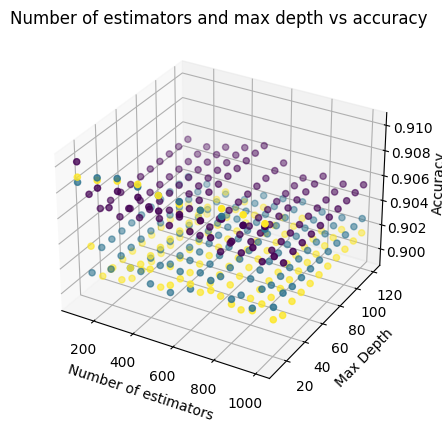

In [101]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=colors)
ax.set_title('Number of estimators and max depth vs accuracy')
ax.set_xlabel('Number of estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Accuracy')
plt.show()